In [1]:
import glob
import json
import gzip
import dill as pickle
import pandas as pd

In [2]:
from truthnet.util import validate
from truthnet.util import calculate_response_parallel

In [14]:
def getresveritas(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['veritas']
def getreskappa(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['lower_threshold']
def getresmu(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['score']
def getres(row):
    with open('../../veritas-experiment3/veritas-experiment/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['responses']
def getsex(row):
    return row.Sex=='Male'
def getethnicity(row):
    if row['Ethnicity simplified'] == 'White':
        return 0
    if row['Ethnicity simplified'] == 'Black':
        return 1
    if row['Ethnicity simplified'] == 'Asian':
        return 2
    if row['Ethnicity simplified'] == 'Mixed':
        return 3
    return 4

def getpklresp(df):
    A=[{k:v} for k,v in ddf['response'].to_dict().items()]
    with gzip.open('../../response_jsons/experiment3-json.pkl.gz','wb') as file:
        pickle.dump(A,file)

filetimes=pd.read_csv('../../veritas-experiment3/filetimes.csv',header=None,sep=' ').dropna(axis=1)
filetimes.columns=['sz','creation','jsonpath']
filetimes.creation = pd.to_datetime(filetimes.creation)
filetimes=filetimes.set_index('creation')
filetimes=filetimes.sort_index().tail(28)
filetimes=filetimes.reset_index()
filetimes['jsonpath'] = [x.split('/')[-1] for x in filetimes.jsonpath.values]


In [15]:
filetimes

,creation,sz,jsonpath
0,2024-01-19 22:41:56+00:00,470,predictions_0aec9e08-9a5b-46ad-bbbe-d14ad81ee2...
1,2024-01-20 02:08:18+00:00,482,predictions_d22a76c7-44b2-4c63-9ea5-a008311dfc...
2,2024-01-23 14:38:11+00:00,485,predictions_fa500846-a86d-440f-a2ab-8f38af52aa...
3,2024-01-26 00:02:35+00:00,504,predictions_3f37900c-b148-436a-a6f3-05ce311040...
4,2024-01-28 16:13:54+00:00,500,predictions_84f4d886-1f81-43ab-85a0-72a48299b3...
5,2024-01-28 16:38:04+00:00,484,predictions_8f98b0f4-1817-4ec2-a05d-909613c428...
6,2024-01-28 16:46:41+00:00,484,predictions_ad32a2f9-9e61-492c-9067-17bc7e00f7...
7,2024-01-28 17:18:52+00:00,494,predictions_d36f06e8-56f9-4b33-8e7a-731377a300...
8,2024-01-28 17:59:40+00:00,481,predictions_198494fc-5bc7-4beb-9ea6-b0f4a1b582...
9,2024-01-28 18:04:51+00:00,497,predictions_5ecaa903-6aa4-47a5-a819-06b661eecd...


In [16]:
file=filetimes.jsonpath.values[0]
file




'predictions_0aec9e08-9a5b-46ad-bbbe-d14ad81ee23d.json'

In [17]:
ddf=filetimes.copy()

ddf['veritas']=ddf.apply(getresveritas,axis=1)
ddf['kappa']=ddf.apply(getreskappa,axis=1)
ddf['score']=ddf.apply(getresmu,axis=1)
#ddf['sex']=ddf.apply(getsex,axis=1)
#ddf['ethnicity']=ddf.apply(getethnicity,axis=1)
#ddf['Age']=ddf.Age.astype(float)
ddf['response'] = ddf.apply(getres,axis=1)
getpklresp(ddf)

In [18]:
calculate_response_parallel('../../response_jsons/experiment3-json.pkl.gz','../../veritas_models/veritas_002.pkl.gz','../../data/res_exp3_model2_psych.csv')

ckeck passed


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [00:40<00:00,  1.45s/it]


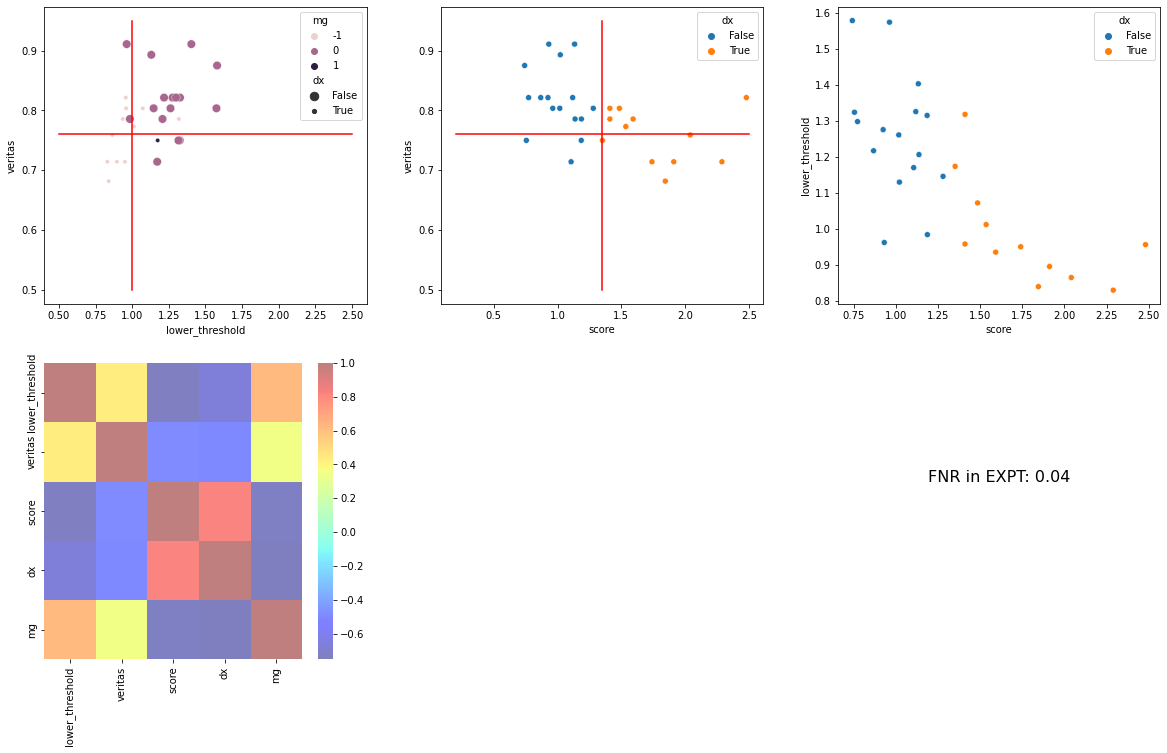

In [19]:
import pandas as pd
resf=pd.read_csv('../../data/res_exp3_model2_psych.csv',index_col=0).T
resf.columns=['lower_threshold','veritas','score']
expd3,expf3=validate(resf,C0=1,C1=0.76,C2=1.35,DX=False,score=True,
         outfile='exptvalid3.png',
         validation_type='fnrexpt')

In [20]:
expd3

{'fnr': 0.03571428571428571}

In [52]:
expf3.columns=['kappa','nu','mu','DX','chi']
expf3.index.name='id'
expf3.to_csv('../tex/Figures/plotdata/expdata_psych_res.csv')
expf3

,kappa,nu,mu,DX,chi
id,,,,,
2,0.935854,0.785714,1.592204,True,-1
6,0.830332,0.714286,2.289181,True,-1
1,1.403637,0.910714,1.133364,False,0
0,1.170680,0.714286,1.105971,False,0
5,0.950780,0.714286,1.740385,True,-1
4,1.318546,0.785714,1.410319,True,-1
3,0.958489,0.803571,1.410198,True,-1
7,1.324599,0.750000,0.754771,False,0
8,1.130457,0.892857,1.021263,False,0


In [55]:
expf3.corr().to_csv('../tex/Figures/plotdata/exp_psychcorr.csv',index=None,header=None)

In [39]:
full_data = [
    ("O'Donnell, Philip (NU)", 'Male', 'Northwestern University', "Forensic Psychiatry"),
    ("Angelotta, Cara (NU)", 'Female', 'Northwestern University', "Forensic Psychiatry"),
    ("Gershan, Scott", 'Male', 'Northwestern University', "Forensic Psychiatry"),
    ("Cavanaugh, James (NU)", 'Male', 'Northwestern University', "Forensic Psychiatry"),
    ("Smith, Krissie (NU)", 'Female', 'Northwestern University', "Forensic Psychiatry"),
    ("Lentini, Nicole", 'Female', 'Northwestern University', "Forensic Psychiatry"),
    ("Heyman-Kantor, Reuben", 'Male', 'Northwestern University', "Forensic Psychiatry"),
    ("Robinson, Lauren (NU)", 'Female', 'Northwestern University', "Forensic Psychiatry"),
    ("Cotton, Erica", 'Female', 'Northwestern University', "Neuropsychology"),
    ("Reilly, James", 'Male', 'Northwestern University', "Neuropsychology"),
    ("Hanlon, Robert", 'Male', 'Northwestern University', "forensic neuropsychology"),
    ("Mackie, Melissa-Ann", 'Female', 'Northwestern University', "Neuropsychology"),
    ("Johnson, Kristina", 'Female', 'Northwestern University', "psychology"),
    ("Rogers, Tatiana", 'Female', 'Northwestern University', "Neuropsychology"),
    ("Washburn, Jason (NU)", 'Male', 'Northwestern University', "psychology"),
    ("Finley, John-Christopher (NU)", 'Male', 'Northwestern University', "Neuropsychology"),
    ("Rothke, Steven (NU)", 'Male', 'Northwestern University', "psychology"),
    ("Heilbronner, Robert (NU)", 'Male', 'Northwestern University', "forensic neuropsychology"),
    ("Song, Woojin", 'Female', 'University of Illinois Chicago', "Neuropsychology"),
    ("Pliskin, Neil H", 'Male', 'University of Illinois Chicago', "neuropsychology"),
    ("Soble, Jason Ryan", 'Male', 'University of Illinois Chicago', "Neuropsychology"),
    ("Leslie Guidotti-Breting", 'Female', 'NorthShore University HealthSystem', "Forensic Neuropsychology"),
    ("Daly, Maureen (NU)", 'Female', 'Northwestern University', "Psychology"),
    ("Fink, Joe [BSD]", 'Male', 'University of Chicago Medicine', "Neurology"),
    ("Leclaire, Kaitlynne", 'Female', 'Northwestern University', "Neuropsychology"),
    ("Hardcastle, Cheshire", 'Female', 'Northwestern University', "Neuropsychology"),
    ("Christopher Grote", 'Male', 'Rush University Medical Center', "Neuropsychology")
]

# Convert the data to a DataFrame
full_df = pd.DataFrame(full_data, columns=["Full Name", "Estimated Sex", "Institution", "Specialty"])

In [40]:
full_df.Specialty = full_df.Specialty.str.lower()

In [48]:
full_df.columns=['name','sex','institution','specialty']

In [50]:
full_df.to_dict()

{'name': {0: "O'Donnell, Philip (NU)",
  1: 'Angelotta, Cara (NU)',
  2: 'Gershan, Scott',
  3: 'Cavanaugh, James (NU)',
  4: 'Smith, Krissie (NU)',
  5: 'Lentini, Nicole',
  6: 'Heyman-Kantor, Reuben',
  7: 'Robinson, Lauren (NU)',
  8: 'Cotton, Erica',
  9: 'Reilly, James',
  10: 'Hanlon, Robert',
  11: 'Mackie, Melissa-Ann',
  12: 'Johnson, Kristina',
  13: 'Rogers, Tatiana',
  14: 'Washburn, Jason (NU)',
  15: 'Finley, John-Christopher (NU)',
  16: 'Rothke, Steven (NU)',
  17: 'Heilbronner, Robert (NU)',
  18: 'Song, Woojin',
  19: 'Pliskin, Neil H',
  20: 'Soble, Jason Ryan',
  21: 'Leslie Guidotti-Breting',
  22: 'Daly, Maureen (NU)',
  23: 'Fink, Joe [BSD]',
  24: 'Leclaire, Kaitlynne',
  25: 'Hardcastle, Cheshire',
  26: 'Christopher Grote'},
 'sex': {0: 'Male',
  1: 'Female',
  2: 'Male',
  3: 'Male',
  4: 'Female',
  5: 'Female',
  6: 'Male',
  7: 'Female',
  8: 'Female',
  9: 'Male',
  10: 'Male',
  11: 'Female',
  12: 'Female',
  13: 'Female',
  14: 'Male',
  15: 'Male',
  

In [45]:
full_df.groupby('Specialty').count()

,Full Name,Estimated Sex,Institution
Specialty,,,
forensic neuropsychology,3,3,3
forensic psychiatry,8,8,8
neurology,1,1,1
neuropsychology,11,11,11
psychology,4,4,4


In [46]:
full_df.groupby('Estimated Sex').count()

,Full Name,Institution,Specialty
Estimated Sex,,,
Female,13,13,13
Male,14,14,14


In [47]:
full_df.groupby('Institution').count()

,Full Name,Estimated Sex,Specialty
Institution,,,
NorthShore University HealthSystem,1,1,1
Northwestern University,21,21,21
Rush University Medical Center,1,1,1
University of Chicago Medicine,1,1,1
University of Illinois Chicago,3,3,3
